<a href="https://colab.research.google.com/github/KaanErdogdu/7_Bootcamo_Siniflandirma_Problemleri/blob/master/7_3_Odev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [8]:
titanic_s = pd.read_csv('titanic_train.csv')
titanic_s.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
titanic_sss= titanic_s[["Sex","Age","SibSp","Parch","Ticket","Fare","Survived"]]

titanic_s.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_sss["kadin_mi"] = pd.get_dummies(titanic_s.Sex, drop_first=True)
titanic_sss.head(5)

,Sex,Age,SibSp,Parch,Ticket,Fare,Survived,kadin_mi
0,male,22.0,1,0,A/5 21171,7.2500,0,1
1,female,38.0,1,0,PC 17599,71.2833,1,0
2,female,26.0,0,0,STON/O2. 3101282,7.9250,1,0
3,female,35.0,1,0,113803,53.1000,1,0
4,male,35.0,0,0,373450,8.0500,0,1


In [11]:
titanic_s2=titanic_sss[["kadin_mi","Age","SibSp","Parch","Fare","Survived"]]
titanic_s2.head()

,kadin_mi,Age,SibSp,Parch,Fare,Survived
0,1,22.0,1,0,7.2500,0
1,0,38.0,1,0,71.2833,1
2,0,26.0,0,0,7.9250,1
3,0,35.0,1,0,53.1000,1
4,1,35.0,0,0,8.0500,0


In [12]:
titanic_s2.isnull().sum()

kadin_mi      0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [13]:
titanic_s3=titanic_s2.dropna(subset=["Age","Fare"])
titanic_s3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kadin_mi  714 non-null    uint8  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   Fare      714 non-null    float64
 5   Survived  714 non-null    int64  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 34.2 KB


In [17]:
X = titanic_s3[["Age","Fare","kadin_mi"]]
y = titanic_s3.Survived
print(X[:5])
print(y[:5])

    Age     Fare  kadin_mi
0  22.0   7.2500         1
1  38.0  71.2833         0
2  26.0   7.9250         0
3  35.0  53.1000         0
4  35.0   8.0500         1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [20]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y,test_size=0.20, random_state=111)

In [21]:
titanic_tahmin_modeli = LogisticRegression()
titanic_tahmin_modeli.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
tahmin_eğitim = titanic_tahmin_modeli.predict(X_eğitim)
tahmin_test = titanic_tahmin_modeli.predict(X_test)

In [23]:
tahmin_test_ihtimal = titanic_tahmin_modeli.predict_proba(X_test)[:,1]


In [24]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [25]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[284  52]
 [ 69 166]]
Hata Matrisi (Test verileri)
------------------------------
[[69 19]
 [16 39]]


In [26]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 69
Doğru pozitif sayısı   : 39
Yanlış pozitif sayısı  : 19
Yanlış negatif sayısı  : 16


69 ölen doğru tahmin ettiğimiz
39 yaşayan doğru tahmin
19 ölmülş olarak tahmin edilen ama yaşayanlar
16 yaşıyor olarak tahmin edilen ama ölenler

In [31]:
from sklearn.metrics import accuracy_score

print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))


Hesaplanan doğruluk değeri      :  0.7552447552447552


In [28]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.6724137931034483
precision_score() değeri        :  0.6724137931034483


In [32]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.6724137931034483
precision_score() değeri        :  0.6724137931034483


In [33]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri   :  0.7090909090909091
recall_score() değeri        :  0.7090909090909091


In [34]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))


Hesaplanan özgünlük değeri   :  0.7840909090909091


In [35]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, tahmin_test)
duyarlılık_değeri = recall_score(y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.6902654867256638
f1_score() değeri     :  0.6902654867256638


In [36]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        88
           1       0.67      0.71      0.69        55

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.74       143
weighted avg       0.76      0.76      0.76       143

f1_score() değeri        : 0.69
recall_score() değeri    : 0.71
precision_score() değeri : 0.67


Hassasiyet : [0.81176471 0.67241379]
Duyarlılık : [0.78409091 0.70909091]
F1 Skoru   : [0.79768786 0.69026549]


In [54]:
tahmin_test_ihtimal = titanic_tahmin_modeli.predict_proba(X_test)[:,1]
#sona eklenen [] içine ne gelmeli

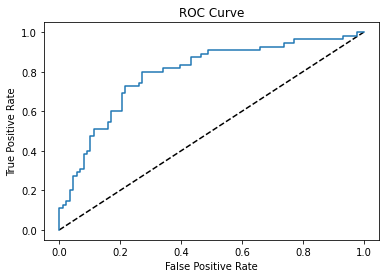

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [56]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))


AUC Değeri :  0.7911157024793388


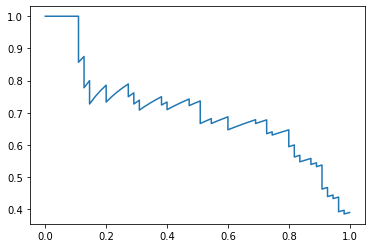

In [57]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

In [58]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(y_test, tahmin_test))

Logartimik Kayıp (log-loss) :  0.5438168553260525
Hata Oranı                  :  0.2447552447552448


In [59]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)  

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.672504,0.664336
1,0.010,0.695271,0.713287
2,0.100,0.784588,0.755245
3,1.000,0.788091,0.755245
4,10.000,0.788091,0.755245
5,100.000,0.788091,0.755245
6,1000.000,0.788091,0.755245
